In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

plt.style.use('ggplot')
%matplotlib inline

## Load data 

* Load in the data
* Clean the column names
* Drop spurious column

In [2]:
incidence=pd.read_csv('incd.csv', encoding='latin1', skiprows=8)
incidence.head()

,County,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate() - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend () in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,"US (SEER+NPCR)(1,10)",0.0,***,16.4,16.3,16.4,58599,rising,0.8,0.6,0.9
1,"Cass County, Illinois(6,10)",17017.0,***,41.1,28,58.5,7,rising,35.1,19.0,53.4
2,"Union County, Florida(6,10)",12125.0,***,38.7,26.6,54.9,7,stable,-16.9,-37.4,10.4
3,"Greene County, Illinois(6,10)",17061.0,***,37.5,24.7,54.9,6,stable,28.7,-19.6,106.1
4,"Benton County, Mississippi(6,10)",28009.0,***,36.6,21.2,59.1,4,stable,23.4,-1.4,54.4


In [3]:
incidence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 11 columns):
County                                                3162 non-null object
 FIPS                                                 3142 non-null float64
Met Healthy People Objective of ***?                  3142 non-null object
Age-Adjusted Incidence Rate() - cases per 100,000    3142 non-null object
Lower 95% Confidence Interval                         3142 non-null object
Upper 95% Confidence Interval                         3142 non-null object
Average Annual Count                                  3142 non-null object
Recent Trend                                          3142 non-null object
Recent 5-Year Trend () in Incidence Rates            3142 non-null object
Lower 95% Confidence Interval.1                       3142 non-null object
Upper 95% Confidence Interval.1                       3142 non-null object
dtypes: float64(1), object(10)
memory usage: 271.8+ KB


In [4]:
incidence.columns

Index(['County', ' FIPS', 'Met Healthy People Objective of ***?',
       'Age-Adjusted Incidence Rate() - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend () in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [5]:
incidence.columns = ['County', 'FIPS', 'Unknown', 'Rate_per_100k', 'lower_95', 'upper_95', 'average_annual_count',
                    'trend', '5_yr_trend', 'lower_95_ci_1', 'upper_95_ci_1']

In [6]:
incidence.drop('Unknown', axis=1, inplace=True)

In [7]:
incidence.head()

,County,FIPS,Rate_per_100k,lower_95,upper_95,average_annual_count,trend,5_yr_trend,lower_95_ci_1,upper_95_ci_1
0,"US (SEER+NPCR)(1,10)",0.0,16.4,16.3,16.4,58599,rising,0.8,0.6,0.9
1,"Cass County, Illinois(6,10)",17017.0,41.1,28,58.5,7,rising,35.1,19.0,53.4
2,"Union County, Florida(6,10)",12125.0,38.7,26.6,54.9,7,stable,-16.9,-37.4,10.4
3,"Greene County, Illinois(6,10)",17061.0,37.5,24.7,54.9,6,stable,28.7,-19.6,106.1
4,"Benton County, Mississippi(6,10)",28009.0,36.6,21.2,59.1,4,stable,23.4,-1.4,54.4


## Do data conversions

Some junk in some of the columns, causing them to be "objects". Convert to correct numeric types. We will see data isn't available for NV, so we will drop those rows.

In [8]:
error_mask = pd.to_numeric(incidence['Rate_per_100k'], errors='coerce').isna()
incidence[error_mask]

,County,FIPS,Rate_per_100k,lower_95,upper_95,average_annual_count,trend,5_yr_trend,lower_95_ci_1,upper_95_ci_1
25,"Osceola County, Michigan(6,10)",26133.0,30.7 #,22.3,41.4,10,stable,-6.6,-24.9,16.0
184,"Presque Isle County, Michigan(6,10)",26141.0,23.9 #,13.3,40.1,5,stable,-19.0,-66.5,96.1
330,"Roscommon County, Michigan(6,10)",26143.0,22.1 #,16,30.5,11,stable,7.4,-20.6,45.2
454,"Van Buren County, Michigan(6,10)",26159.0,20.9 #,16.8,25.8,19,stable,-5.6,-20.8,12.4
630,"Bay County, Michigan(6,10)",26017.0,19.6 #,16.3,23.5,27,stable,-1.6,-16.9,16.5
633,"Delta County, Michigan(6,10)",26041.0,19.6 #,14.4,26.3,11,stable,3.8,-15.1,27.0
651,"Berrien County, Michigan(6,10)",26021.0,19.5 #,16.8,22.7,38,stable,2.2,-8.1,13.6
695,"Chippewa County, Michigan(6,10)",26033.0,19.3 #,14,26.1,9,stable,8.2,-33.0,74.5
797,"Otsego County, Michigan(6,10)",26137.0,18.7 #,12.5,27.3,6,stable,4.4,-31.9,60.2
816,"Ionia County, Michigan(6,10)",26067.0,18.6 #,14.3,23.8,13,stable,-6.8,-24.2,14.7


Ok, row 3142 onward are `NaN` because they are footer notes at the end of the file. We will use FIPS being `NaN` as a  programmatic way of detecting this, and checking we only delete the desired rows

In [9]:
footer_mask = incidence['FIPS'].isna()
incidence[footer_mask]

,County,FIPS,Rate_per_100k,lower_95,upper_95,average_annual_count,trend,5_yr_trend,lower_95_ci_1,upper_95_ci_1
3142,Created by statecancerprofiles.cancer.gov on 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3143,Data for the United States does not include da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3144,*** No Healthy People 2020 Objective for this ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3145,State Cancer Registries may provide more curre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3146," Incidence rates (cases per 100,000 populatio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3147, Incidence data come from different sources. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,Healthy People 2020 Objectives [ https://www.h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,¶ Data not available because of state legisla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,# Data do not include cases diagnosed in other...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,* Data has been suppressed to ensure confident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
incidence = incidence[~footer_mask]

In [11]:
incidence['Rate_per_100k'] = incidence['Rate_per_100k'].str.replace('#', '')
error_mask = pd.to_numeric(incidence['Rate_per_100k'], errors='coerce').isna()
incidence[error_mask]

,County,FIPS,Rate_per_100k,lower_95,upper_95,average_annual_count,trend,5_yr_trend,lower_95_ci_1,upper_95_ci_1
2065,"Adair County, Iowa(7)",19001.0,*,*,*,3 or fewer,*,*,*,*
2066,"Adair County, Kentucky(7)",21001.0,*,*,*,3 or fewer,*,*,*,*
2067,"Adair County, Missouri(6,10)",29001.0,*,*,*,3 or fewer,*,*,*,*
2068,"Adams County, Idaho(6,10)",16003.0,*,*,*,3 or fewer,*,*,*,*
2069,"Adams County, Iowa(7)",19003.0,*,*,*,3 or fewer,*,*,*,*
2070,"Adams County, North Dakota(6,10)",38001.0,*,*,*,3 or fewer,*,*,*,*
2071,"Adams County, Washington(6,10)",53001.0,*,*,*,3 or fewer,*,*,*,*
2072,"Alamosa County, Colorado(6,10)",8003.0,*,*,*,3 or fewer,*,*,*,*
2073,"Albany County, Wyoming(6,10)",56001.0,*,*,*,3 or fewer,*,*,*,*
2074,"Alcona County, Michigan(6,10)",26001.0,*,*,*,3 or fewer,*,*,*,*


In [12]:
incidence.loc[error_mask, 'Rate_per_100k'].value_counts()

*      868
¶      192
¶¶      17
Name: Rate_per_100k, dtype: int64

In [13]:
incidence = incidence[~error_mask]

Okay, this is now our cleaned dataset.

In [14]:
incidence

,County,FIPS,Rate_per_100k,lower_95,upper_95,average_annual_count,trend,5_yr_trend,lower_95_ci_1,upper_95_ci_1
0,"US (SEER+NPCR)(1,10)",0.0,16.4,16.3,16.4,58599,rising,0.8,0.6,0.9
1,"Cass County, Illinois(6,10)",17017.0,41.1,28,58.5,7,rising,35.1,19.0,53.4
2,"Union County, Florida(6,10)",12125.0,38.7,26.6,54.9,7,stable,-16.9,-37.4,10.4
3,"Greene County, Illinois(6,10)",17061.0,37.5,24.7,54.9,6,stable,28.7,-19.6,106.1
4,"Benton County, Mississippi(6,10)",28009.0,36.6,21.2,59.1,4,stable,23.4,-1.4,54.4
5,"Hamilton County, Illinois(6,10)",17065.0,36.3,22.1,57.2,4,stable,2.5,-43.0,84.2
6,"Holmes County, Mississippi(6,10)",28051.0,36.2,25.1,50.6,7,stable,35.1,-15.2,115.1
7,"Dawson County, Texas(6,10)",48115.0,36.2,23.5,53.4,5,stable,-5.2,-37.9,44.8
8,"Powell County, Kentucky(7)",21197.0,35.8,22.5,54.3,5,*,*,*,*
9,"Edmonson County, Kentucky(7,8)",21061.0,34.4,22.2,51.3,5,rising,8.1,2.7,13.8


In [15]:
incidence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 10 columns):
County                  2065 non-null object
FIPS                    2065 non-null float64
Rate_per_100k           2065 non-null object
lower_95                2065 non-null object
upper_95                2065 non-null object
average_annual_count    2065 non-null object
trend                   2065 non-null object
5_yr_trend              2065 non-null object
lower_95_ci_1           2065 non-null object
upper_95_ci_1           2065 non-null object
dtypes: float64(1), object(9)
memory usage: 177.5+ KB


In [16]:
incidence['FIPS'] = incidence['FIPS'].astype(int)

for col in incidence.columns[2:]:
    if col == 'trend':
        continue
    incidence[col] = pd.to_numeric(incidence[col], errors='coerce')

In [17]:
incidence.to_pickle('kidney_incidence.pkl')

### Some initial naive plots

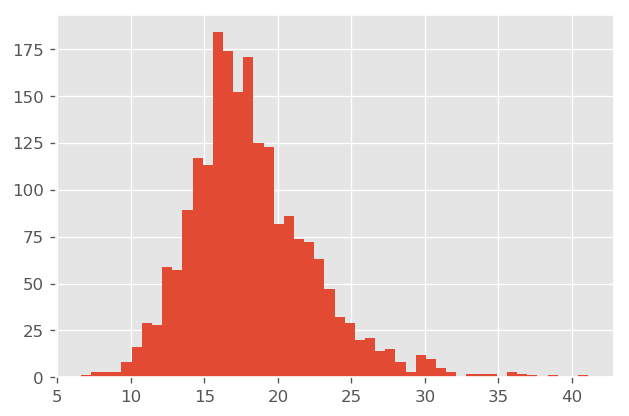

In [18]:
plt.figure(dpi=120)
plt.hist(incidence['Rate_per_100k'], bins=50);

Had some problems pulling population data for the appropriate years. We will use rate per 100k and average annual count to infer the population. This isn't perfect because the rate is age adjusted.

In [19]:
incidence['population'] = (100000*incidence['average_annual_count']/incidence['Rate_per_100k']).astype(int)

In [20]:
average_rate = (incidence.loc[1:, 'population'] * incidence.loc[1:, 'Rate_per_100k']).sum()/(incidence.loc[1:, 'population'].sum())
average_rate

16.387736201837217

Drop the first row, it is just a summary statistics

In [21]:
incidence.drop(0, inplace=True)

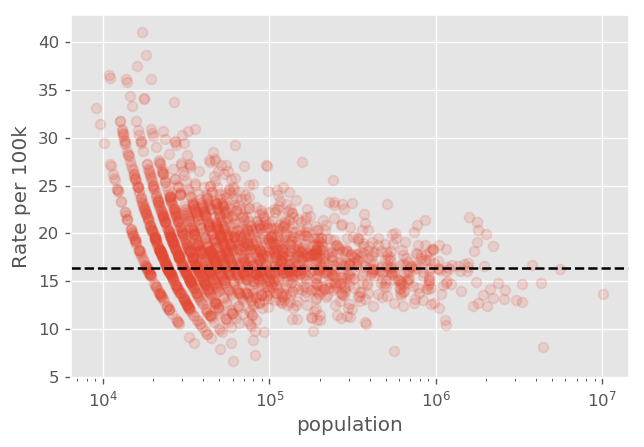

In [22]:
plt.figure(dpi=120)
plt.semilogx(incidence['population'], incidence['Rate_per_100k'], marker='o', linestyle='None', alpha=0.15)
plt.xlabel('population')
plt.ylabel('Rate per 100k')
plt.gca().axhline(average_rate, c='k', linestyle='--');

In [23]:
largish = incidence['population'] > 1e5

In [24]:
# Estimate the beta parameters using the method of moments
variance_in_rate = incidence.loc[largish, 'Rate_per_100k'].var()/100000

average_rate = incidence.loc[largish, 'Rate_per_100k'].mean()/100000

alpha0 = average_rate*(average_rate*(1-average_rate)/variance_in_rate - 1)
beta0 = (1-average_rate)*(average_rate*(1-average_rate)/variance_in_rate - 1)

In [25]:
average_rate

0.000167954128440367

In [26]:
average_rate*(1-average_rate)/variance_in_rate

2.2579582571312464

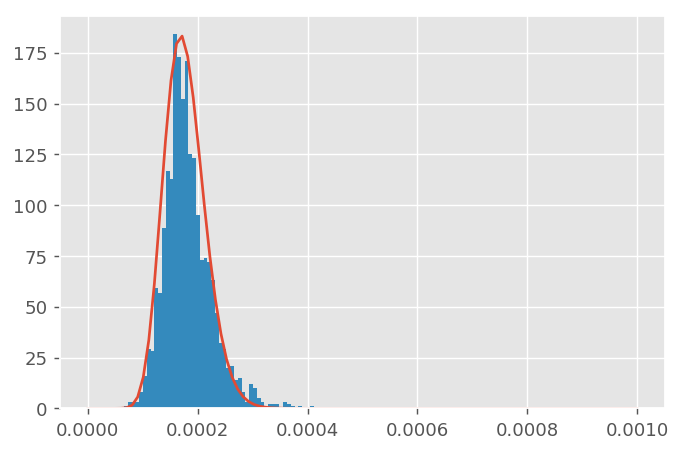

In [27]:
from scipy.stats import beta
plt.figure(dpi=130)
X = np.linspace(0, 0.001, 100)
plt.plot(X, beta.pdf(X, a=23, b=130000, loc=0, scale=1)/60)
plt.hist(incidence['Rate_per_100k']/100000, bins=50);

In [28]:
# use a = 23, b = 130000 for our shrinkage estimates
alpha0, beta0 = 23, 130000
incidence['shrinkage'] = 100000*(incidence['average_annual_count'] + alpha0)/(incidence['population'] + beta0 + alpha0)

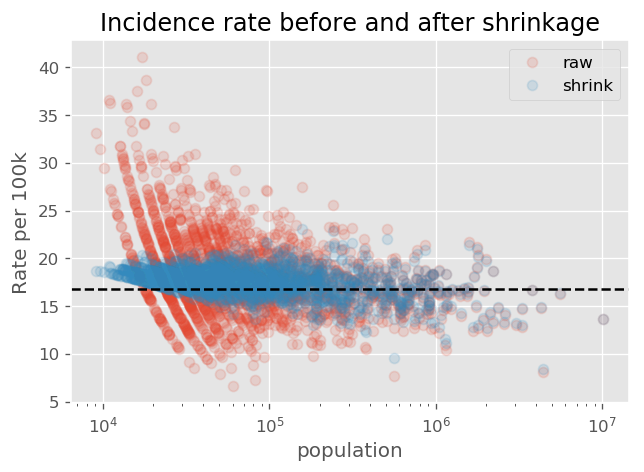

In [29]:
plt.figure(dpi=120)
plt.semilogx(incidence['population'], incidence['Rate_per_100k'], marker='o', linestyle='None', alpha=0.15, label='raw')
plt.semilogx(incidence['population'], incidence['shrinkage'], marker='o', linestyle='None', alpha=0.15, label='shrink')
plt.legend()
plt.title('Incidence rate before and after shrinkage')
plt.xlabel('population')
plt.ylabel('Rate per 100k')
plt.gca().axhline(average_rate*100000, c='k', linestyle='--');

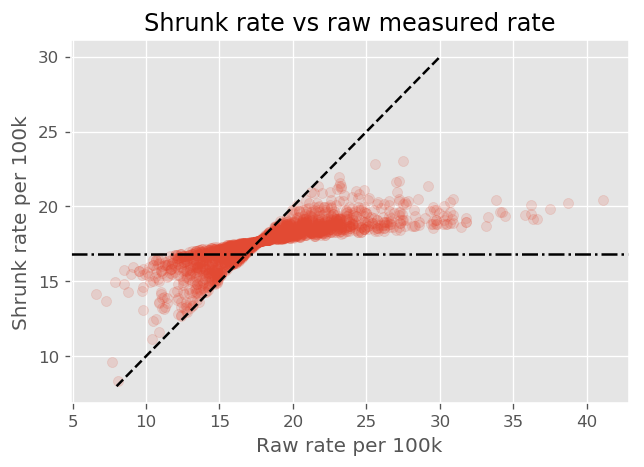

In [30]:
plt.figure(dpi=120)
plt.scatter(incidence['Rate_per_100k'], incidence['shrinkage'], alpha=0.15)
plt.plot([8,30], [8,30], 'k--')
plt.gca().axhline(average_rate*100000, c='k', linestyle='-.')
plt.title('Shrunk rate vs raw measured rate')
plt.xlabel('Raw rate per 100k')
plt.ylabel('Shrunk rate per 100k');

In [31]:
alpha0, beta0, _, __ = beta.fit(incidence['Rate_per_100k']/1e5, floc=0., fscale=1.)

In [32]:
alpha0, beta0

(19.366567948095202, 106389.18721541032)

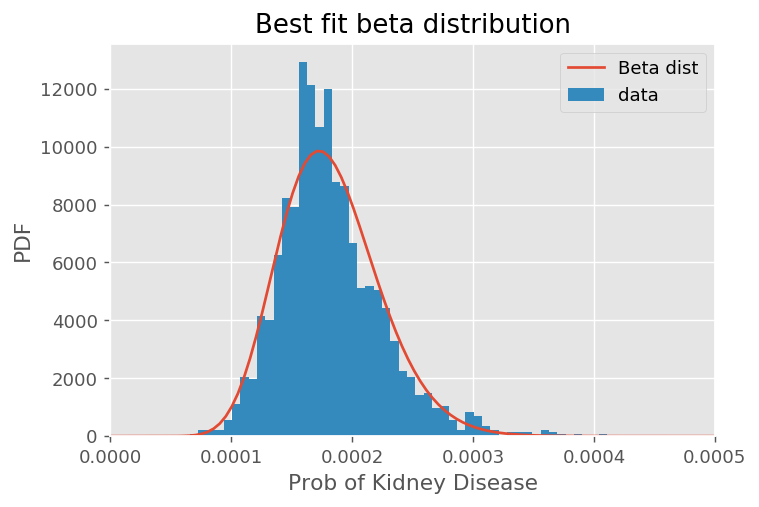

In [33]:
plt.figure(dpi=130)
X = np.linspace(0, 0.001, 200)
plt.plot(X, beta.pdf(X, a=alpha0, b=beta0, loc=0, scale=1), label='Beta dist')
plt.hist(incidence['Rate_per_100k']/100000, bins=50, normed=True, label='data')
plt.xlim(0,5e-4)
plt.title('Best fit beta distribution')
plt.legend()
plt.xlabel('Prob of Kidney Disease')
plt.ylabel('PDF');